# Checkpoint 2
# Peter Caintic (Solo)

Importing libraries:

In [402]:
import pandas as pd
import numpy as np
import scipy.stats as scst

Reading the dataset into a dataframe. Dataset can be found at the following link: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

In [403]:
df = pd.read_csv("games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Outputting some basic information about shape of the dataframe:

In [404]:
print(f"Column names: {list(df.columns)}.")
print(f"Dimensions: {df.shape[0]} rows and {df.shape[1]} columns.")
print("Data types:===============================================" + 
      f"\n{df.dtypes}\n" + 
      "==========================================================")

Column names: ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'].
Dimensions: 85103 rows and 39 columns.
Data types:===============================================
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count             

## Cleaning and modifying the data set

Converting release date column to datetimes:

In [405]:
def sanitize_dates(date:str):
    split_date = date.split(",")
    # If there's no comma in the date, assume no release day is specified; default to 1st of the month
    if len(split_date) == 1:
        split_date = date.split(" ")
        return f"{split_date[0]} 1, {split_date[1]}"
    else:
        return date

df["Release date"] = df["Release date"].apply(sanitize_dates)
df["Release date"] = pd.to_datetime(df["Release date"], format="%b %d, %Y")

In [406]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Separating "Categories", "Genres", and "Tags" column entries into lists:

In [407]:
def simple_split(string, delim:str):
    if pd.isna(string):
        return pd.NA
    else:
        return string.split(delim)

df["Categories"] = df["Categories"].apply(simple_split, args=(","))
df["Genres"] = df["Genres"].apply(simple_split, args=(","))
df["Tags"] = df["Tags"].apply(simple_split, args=(","))

In [408]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Separating "Supported languages" column entries into lists:

In [409]:
def sup_lang_split(string):
    if pd.isna(string):
        return pd.NA
    else:
        cleaned_str = string.replace("'", "").replace("[", "").replace("]", "")
        return cleaned_str.split(",")

df["Supported languages"] = df["Supported languages"].apply(sup_lang_split)

In [410]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,[English],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"[English, French, Italian, German, Spanish...",...,0,0,0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"[English, Portuguese - Brazil]",...,0,0,0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"[English, French, Italian, German, Spanish...",...,0,0,0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"[English, Spanish - Spain]",...,0,0,0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Getting Single-player and Multi-player columns:

In [411]:
def in_list_elt(x, match=""):
    if np.any(pd.isna(x)):
        return 0
    elif (match in x):
        return 1
    else:
        return 0

df["Single-player"] = df["Categories"].apply(lambda x: in_list_elt(x, match="Single-player"))
df["Multi-player"] = df["Categories"].apply(lambda x: in_list_elt(x, match="Multi-player"))

In [412]:
df.head()
# For debugging: Apex Legends, a multiplayer-only game
# df[df["AppID"] == 1172470]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Single-player,Multi-player
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,[English],...,0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"[English, French, Italian, German, Spanish...",...,0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"[English, Portuguese - Brazil]",...,0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"[English, French, Italian, German, Spanish...",...,0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"[English, Spanish - Spain]",...,0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0


Adding "Total Ratings" and "Percent Positive Ratings" columns

In [429]:
df["Total Ratings"] = df["Positive"] + df["Negative"]
df["Percent Positive Ratings"] = (df["Positive"] / df["Total Ratings"]) * 100.0
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Single-player,Multi-player,Total Ratings,Percent Positive Ratings
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,[English],...,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,17,35.294118
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"[English, French, Italian, German, Spanish...",...,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,58,91.379310
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"[English, Portuguese - Brazil]",...,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"[English, French, Italian, German, Spanish...",...,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,3,100.000000
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"[English, Spanish - Spain]",...,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,58,86.206897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,2669080,Mannerheim's Saloon Car,2024-01-02,0 - 0,0,0,0.00,0,Marshal Mannerheim’s Saloon Car is the train c...,"[English, Finnish]",...,"Sodan ja rauhan keskus Muisti, Päämajamuseo","[Single-player, Tracked Controller Support, VR...","[Adventure, Simulation]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN
85099,2736910,Beer Run,2024-01-03,0 - 0,0,0,0.00,0,Beer Run is an Indie game created to steal bee...,[English],...,955 Games,[Single-player],"[Casual, Indie]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN
85100,2743220,My Friend The Spider,2024-01-04,0 - 0,0,0,0.00,0,A small 'horror' narrative game about isolatio...,[English],...,MCA,[Single-player],"[Adventure, Simulation]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN
85101,2293130,Path of Survivors,2024-01-08,0 - 0,0,0,3.99,0,Path of Survivors is a multi-class auto-battle...,[English],...,Limited Input,"[Single-player, Steam Achievements, Partial Co...","[Action, Casual, Indie, RPG, Simulation]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN


## Drawing conclusions!

## The outliers

Exploring price information:
First, a plot!

<Axes: >

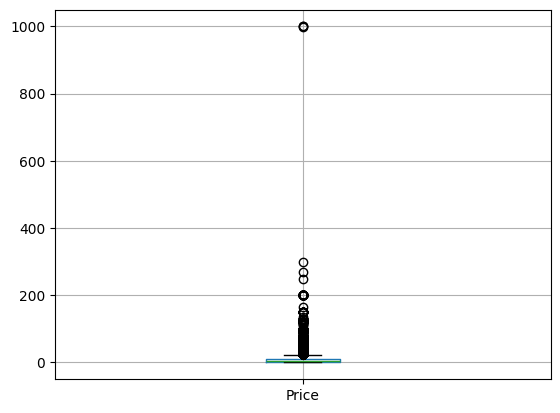

In [414]:
df.boxplot("Price")

Wow, those are some crazy outliers!
What accounts for them?

Steam lists the base price of games in this dataset, so limited/collector's editions of games can't account for it...

The industry standard for the highest-profile, biggest budget releases (called "AAA" or "triple-A" games) is $70, and so this should be the upper bound for game prices. Let's examine the ones listed for a greater price:

In [415]:
df[["AppID", "Name", "Peak CCU", "Price", "About the game"]][df["Price"] > 900]

,AppID,Name,Peak CCU,Price,About the game
26936,1200520,Ascent Free-Roaming VR Experience,0,999.00,The Ascent is a Free-Roaming highly immersive ...
81901,2499620,The Leverage Game,0,999.98,The Leverage Game is a board game in which pla...
82971,2504210,The Leverage Game Business Edition,0,999.98,The Leverage Game is a board game in which pla...


In [416]:
df_spensy = df[df["Price"] > 70]
print("Games listed for more than $70:")
print(f"Number of games: {df_spensy["AppID"].count()}")
print(f"Average Peak Concurrent Users: {df_spensy["Peak CCU"].mean()}")
df_spensy[df_spensy["Price"] == df_spensy["Price"].max()]


Games listed for more than $70:
Number of games: 196
Average Peak Concurrent Users: 6.071428571428571


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Single-player,Multi-player,Total Ratings,Percent Positive Ratings
81901,2499620,The Leverage Game,2023-08-25,0 - 20000,0,0,999.98,0,The Leverage Game is a board game in which pla...,"[English, Japanese]",...,A&S Inc.,"[Single-player, Multi-player, PvP, Online PvP]","[Indie, Simulation]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,0,NaN
82971,2504210,The Leverage Game Business Edition,2023-08-26,0 - 20000,0,0,999.98,0,The Leverage Game is a board game in which pla...,"[English, Japanese]",...,A&S Inc.,"[Single-player, Multi-player, PvP]","[Indie, Simulation]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,0,NaN


As we can see, these are relatively few games, and not very many people play them at all. 

Diving deeper in to the games' store pages, things get very weird very quickly. I obviously can't go into every game, but the bulk of them seem to be what the gaming community calls "asset flips": games that utilize royalty-free store-bought assets (characters, environments, even code), repackage them, and attempt to market them to unsuspecting customers. In short, they're scams.

For example, one of the most expensive games on this storefront (listed for $999) is called "Ascent Free-Roaming VR Experience" by Fury Games. A quick visual inspection will make it obvious that the game is attempting pass itself as a spin-off of "The Ascent", a $40 game by Neon Giant, a completely different developer. The reviews are clearly bots, as they have no playtime and all have identical content: the simple phrase "Not bad."

Suffice it to say, these prices should probably be ignored.

<Axes: >

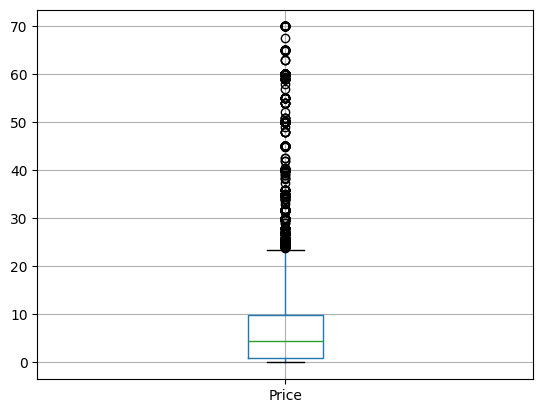

In [417]:
df = df[df["Price"] <= 70]
df.boxplot("Price")

Note that now, the data still has many outliers. The histogram below shows why:

<Axes: >

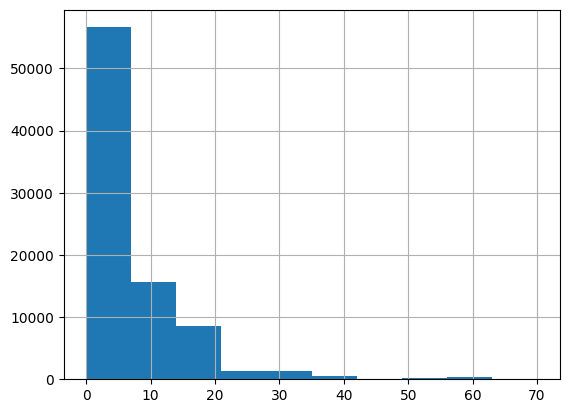

In [418]:
df["Price"].hist(range=[0, 70])

The data is horrifically left-skewed, and is obviously non-normal. This is because, while the most famous games are in the $40-$70 range, the vast, vast majority of games that get made are by smaller studios, and are therefore priced lower. 

While games above ~$20 might be considered outliers, I think it's still useful to include them in the dataset, since they are actual games.

## CLT Analysis: Price

Since our price data is clearly not normally-distributed, let's take the arithmetic mean of several samples to invoke the Central Limit Theorem. 

In [419]:
def get_sample_mean(x, df:pd.DataFrame, sample_size:int):
    return df.sample(sample_size).mean()

n_samples = 10000
sample_size = 100
norm_name = "Normal Data Samples"

In [420]:
pr_means = np.empty([n_samples])

clt_df = pd.DataFrame(pr_means)
clt_df = clt_df.rename(columns={0: norm_name})

clt_df[norm_name] = clt_df[norm_name].apply(lambda x: get_sample_mean(x, df["Price"], sample_size))


Mean of normal data: 6.869366499999999
Standard Deviation of normal data: 0.8686515230554774


array([[<Axes: title={'center': 'Normal Data Samples'}>]], dtype=object)

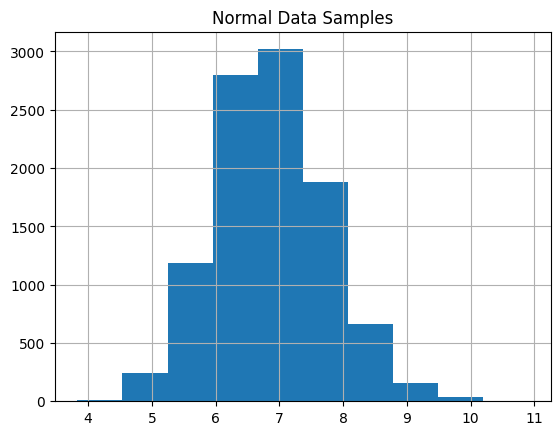

In [421]:
print(f"Mean of normal data: {clt_df[norm_name].mean()}")
print(f"Standard Deviation of normal data: {clt_df[norm_name].std()}")
clt_df.hist()

# Price and Multiplayer

Let's investigate whether a game having multiplayer has an affect on the mean price. First, let's generate the multiplayer samples:

In [422]:
mult_name = "Multi-player Prices"

In [423]:
mult_df = df[df["Multi-player"] != 0]
mult_df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Single-player,Multi-player,Total Ratings,Percent Positive Ratings
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,[English],...,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,17,35.294118
5,1469160,Wartune Reborn,2021-02-26,50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,[English],...,7Road,"[Single-player, Multi-player, MMO, PvP, Online...","[Adventure, Casual, Free to Play, Massively Mu...","[Turn-Based Combat, Massively Multiplayer, Mul...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,136,63.970588
11,485000,Cthulhu Realms,2016-07-01,50000 - 100000,0,0,0.00,1,Star Realms has gone insane! Introducing Cthul...,[English],...,"Wise Wizard Games, LLC","[Single-player, Multi-player, Shared/Split Scr...",[Strategy],"[Card Game, Strategy, Deckbuilding, Lovecrafti...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,205,71.707317
15,22670,Alien Breed 3: Descent,2010-11-17,200000 - 500000,3,0,9.99,0,Alien Breed™ 3: Descent is the final explosive...,"[English, French, German, Italian, Japanes...",...,Team17 Digital Ltd,"[Single-player, Multi-player, Co-op, Steam Ach...",[Action],"[Action, Shooter, Sci-fi, Aliens, Third Person...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,1,1,483,72.256729
20,290870,Steam Squad,2016-07-28,20000 - 50000,0,0,17.99,1,"Steam Squad - tactical wargame, where gameplay...","[English, Russian, French, German]",...,Bretwalda Games,"[Single-player, Multi-player, PvP, Shared/Spli...","[Indie, Strategy]","[Strategy, Indie, Turn-Based, World War I, Ste...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,90,67.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85057,2680190,Rails Across America,2024-01-06,0 - 20000,1,0,9.99,0,Rails Across America is a game of railroad emp...,"[English, Russian]",...,Strategy First,"[Single-player, Multi-player, PvP, LAN PvP, St...","[Simulation, Strategy]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,0,NaN
85070,2626090,Kill Ball,2024-01-05,0 - 0,0,0,0.99,0,"Welcome! It's 1996, and the popular game show ...",[English],...,Zac Smith,"[Multi-player, PvP, Shared/Split Screen PvP, S...","[Action, Casual, Indie, Sports]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0,1,0,NaN
85071,2441260,Event Race,2024-01-05,0 - 0,0,0,0.00,0,Event Race is your ultimate local multiplayer ...,[English],...,Eventgames,"[Single-player, Multi-player, PvP, Shared/Spli...","[Indie, Racing, Early Access]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,0,NaN
85081,2680080,minitechno,2024-01-07,0 - 0,0,0,5.99,0,"Developed with teachers and educators, minitec...","[English, French]",...,technofou colorstorm,"[Single-player, Multi-player, Co-op, Shared/Sp...","[Casual, Indie]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,1,0,NaN


In [424]:
clt_df[mult_name] = clt_df[norm_name].apply(lambda x: get_sample_mean(x, mult_df["Price"], sample_size))

Mean of multiplayer data: 8.720135469999999
Standard Deviation of multiplayer data: 1.0606087025811537


<Axes: >

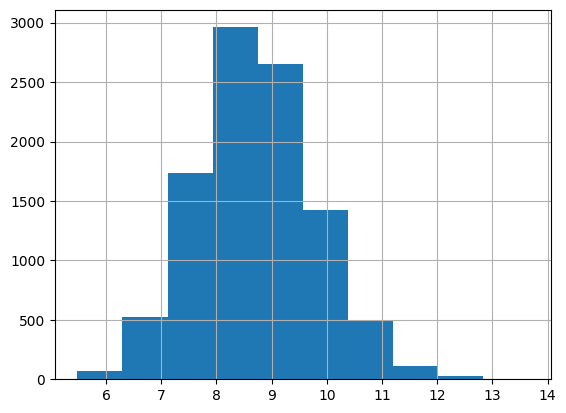

In [425]:
print(f"Mean of multiplayer data: {clt_df[mult_name].mean()}")
print(f"Standard Deviation of multiplayer data: {clt_df[mult_name].std()}")
clt_df[mult_name].hist()

The mean for multiplayer games is higher!
Now we'll run a two-sampled t-test to see if these are statistically significant.

Null Hypothesis: Games with multiplayer have the same mean sample price as any other game.
Alternative Hypothesis: The mean price for games with multiplayer is different from the normal mean price.

In [426]:
scst.ttest_ind(clt_df[norm_name], clt_df[mult_name], equal_var=False, nan_policy="omit").pvalue

0.0

The p-value for the t-test is less than 0.05 (our significance level), so there is a statistically significant difference! Multiplayer games seem to be more expensive on average than singleplayer games. This could be because multiplayer games are typically more difficult to develop, since they need network programming.

# Price and Singleplayer

Now let's see if a game being only singleplayer affects its price. We start by taking samples and their means, as before:

In [433]:
sing_name = "Singleplayer Prices"

In [432]:
sing_df = df[df["Single-player"] == 1]
sing_df = sing_df[df["Multi-player"] == 0]
sing_df

C:\Users\caintpet\AppData\Local\Temp\ipykernel_33372\641947385.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sing_df = sing_df[df["Multi-player"] == 0]


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Single-player,Multi-player,Total Ratings,Percent Positive Ratings
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"[English, French, Italian, German, Spanish...",...,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,58,91.379310
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"[English, Portuguese - Brazil]",...,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"[English, French, Italian, German, Spanish...",...,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,3,100.000000
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"[English, Spanish - Spain]",...,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,58,86.206897
6,1659180,TD Worlds,2022-01-09,0 - 20000,3,0,10.99,1,"TD Worlds is a dynamic, highly strategical gam...","[English, Russian, Danish]",...,MAKSIM VOLKAU,"[Single-player, Steam Achievements, Steam Cloud]","[Indie, Strategy]","[Tower Defense, Rogue-lite, RTS, Replay Value,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,28,75.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,2669080,Mannerheim's Saloon Car,2024-01-02,0 - 0,0,0,0.00,0,Marshal Mannerheim’s Saloon Car is the train c...,"[English, Finnish]",...,"Sodan ja rauhan keskus Muisti, Päämajamuseo","[Single-player, Tracked Controller Support, VR...","[Adventure, Simulation]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN
85099,2736910,Beer Run,2024-01-03,0 - 0,0,0,0.00,0,Beer Run is an Indie game created to steal bee...,[English],...,955 Games,[Single-player],"[Casual, Indie]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN
85100,2743220,My Friend The Spider,2024-01-04,0 - 0,0,0,0.00,0,A small 'horror' narrative game about isolatio...,[English],...,MCA,[Single-player],"[Adventure, Simulation]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN
85101,2293130,Path of Survivors,2024-01-08,0 - 0,0,0,3.99,0,Path of Survivors is a multi-class auto-battle...,[English],...,Limited Input,"[Single-player, Steam Achievements, Partial Co...","[Action, Casual, Indie, RPG, Simulation]",<NA>,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1,0,0,NaN


In [434]:
clt_df[sing_name] = clt_df[norm_name].apply(lambda x: get_sample_mean(x, mult_df["Price"], sample_size))

Mean of singleplayer data: 8.74675726
Standard Deviation of singleplayer data: 1.0557269892481083


<Axes: >

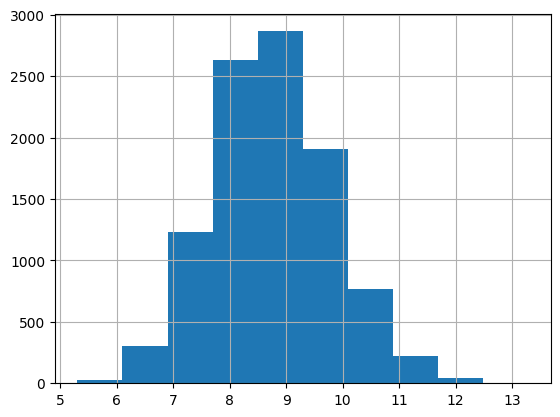

In [436]:
print(f"Mean of singleplayer data: {clt_df[sing_name].mean()}")
print(f"Standard Deviation of singleplayer data: {clt_df[sing_name].std()}")
clt_df[sing_name].hist()

And now we take the t-test of this against the normal overall data:

In [439]:
scst.ttest_ind(clt_df[norm_name], clt_df[sing_name], equal_var=False, nan_policy="omit").pvalue

0.0

Again we see that the p-value is below our significance level, and meaning there is a statistically significant difference in the price between games that are not labeled with muliplayer (but labeled with singleplayer) and all other games.

This is puzzling, though, since it is in the same direction as the games with multiplayer; we'd expect the mean for single-player only games to be lower, if multiplayer games were indeed more expensive as we saw before. If we run a two-sampled t-test between single-player and multi-player games...

In [440]:
scst.ttest_ind(clt_df[mult_name], clt_df[sing_name], equal_var=False, nan_policy="omit").pvalue

0.07526126693363251

We can see that there is NOT a statistically significant difference between the price of games with multiplayer and games with only singleplayer. 

What conclusion can we draw from this then? Well, it may be that games that are ***properly labeled*** as single-player and multi-player are more expensive on average. This may simply be because the more expensive the game, the more likely that the developers will take the time to get these labels correctly.